<a href="https://colab.research.google.com/github/mittalanuj2409/Major-Project/blob/main/cnn(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images = "./drive/MyDrive/Major Project/Final"
y = pd.read_csv("./drive/MyDrive/Major Project/Data3D.csv")

In [4]:
a = os.listdir(images)
a.sort()

In [5]:
img_size = 80

In [6]:
path = images
data1 = []
data2 = []
for img in a[:3048]:
    pic = cv2.imread(os.path.join(path,img))
    pic2 = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic1 = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    # pic1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    pic1 = cv2.resize(pic1,(img_size,img_size))
    pic2 = cv2.resize(pic2,(img_size,img_size))
    data1.append([pic1])
    data2.append([pic2])

In [7]:
np.array(data1).shape

(3048, 1, 80, 80)

In [8]:
datagray = np.array(data1)
datagray = np.squeeze(datagray)
datagray.shape

(3048, 80, 80)

In [9]:
datargb = np.array(data2)
datargb = np.squeeze(datargb)
datargb.shape

(3048, 80, 80, 3)

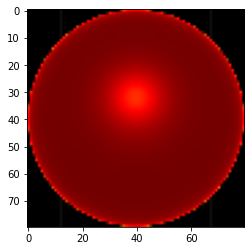

In [10]:
plt.imshow(datargb[5].reshape(img_size, img_size,3))

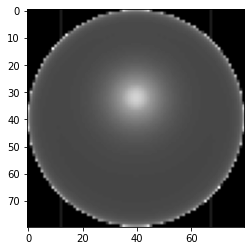

In [11]:
plt.imshow(datagray[5], cmap='gray')

In [12]:
datagray = datagray.reshape(-1, img_size, img_size, 1)
datargb = datargb.reshape(-1, img_size, img_size, 3)

In [13]:
y.drop('label', inplace=True, axis=1)

In [14]:
datagray.shape, datargb.shape, y.shape

((3048, 80, 80, 1), (3048, 80, 80, 3), (3048, 4))

In [43]:
from sklearn.model_selection import train_test_split
train_Xgray,test_Xgray,train_ygray,test_ygray = train_test_split(datagray,y, test_size=0.2, random_state=13)
train_Xrgb,test_Xrgb,train_yrgb,test_yrgb = train_test_split(datargb,y, test_size=0.2, random_state=13)

In [44]:
from keras.layers import Dense, Conv2D, Flatten

In [58]:
# For grayscale

model1 = Sequential()
model1.add(Conv2D(16, (3,3), activation="relu", input_shape=(img_size,img_size, 1), kernel_initializer='he_uniform'))
model1.add(Flatten())

model1.add(Dense(16, activation="relu"))
model1.add(Dense(16, activation="relu"))
model1.add(Dense(32, activation="relu"))
model1.add(Dense(4),)
model1.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model1.summary()


##33333333333333333333333333333
#model1 = Sequential()
#model1.add(Conv2D(32, 3, activation="relu", input_shape=(img_size,img_size, 1), kernel_initializer='he_uniform'))
#model1.add(Flatten())
#model1.add(Dense(16, activation="relu"))
#model1.add(Dense(4))
#model1.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
#model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 78, 78, 16)        160       
_________________________________________________________________
flatten_10 (Flatten)         (None, 97344)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                1557520   
_________________________________________________________________
dense_41 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_42 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 132       
Total params: 1,558,628
Trainable params: 1,558,628
Non-trainable params: 0
___________________________________________

In [59]:
# For rgb
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation="relu", input_shape=(img_size,img_size, 3), kernel_initializer='he_uniform'))

model2.add(Flatten())

model2.add(Dense(16, activation="relu"))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(4),)
model2.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model2.summary()


#model2 = Sequential()
#model2.add(Conv2D(32, 3, activation="relu", input_shape=(img_size,img_size, 3), kernel_initializer='he_uniform'))
#model2.add(Flatten())
#model2.add(Dense(16, activation="relu"))
#model2.add(Dense(4))
#model2.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
#model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 78, 78, 16)        448       
_________________________________________________________________
flatten_11 (Flatten)         (None, 97344)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                1557520   
_________________________________________________________________
dense_45 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 132       
Total params: 1,558,916
Trainable params: 1,558,916
Non-trainable params: 0
___________________________________________

In [60]:
model1.fit(train_Xgray, train_ygray, batch_size=20,epochs=50, verbose=0)

In [61]:
model2.fit(train_Xrgb, train_yrgb, batch_size=20,epochs=50, verbose=0)

In [62]:
ypred1 = pd.DataFrame(model1.predict(test_Xgray), columns = ['diameter', 'x', 'y', 'z'])
ypred2 = pd.DataFrame(model2.predict(test_Xrgb), columns = ['diameter', 'x', 'y', 'z'])

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import math
import statistics

In [64]:
#for Grayscale
print('Grayscale')
for col in y:
  print(col)
  print('r2_score: ', r2_score(test_ygray[col], ypred1[col]))
  rmse = math.sqrt(mean_squared_error(test_ygray[col], ypred1[col]))
  print('rmse: ', rmse)
  print('rrmse: ', rmse/np.mean(ypred1[col]))
  print(' ')

Grayscale
diameter
r2_score:  -0.0010065763686308848
rmse:  0.7861613061379363
rrmse:  0.39301117365468036
 
x
r2_score:  -9.113660425441594e-05
rmse:  2.293462477865233
rrmse:  692.3723657851237
 
y
r2_score:  -0.008054192163001739
rmse:  2.4518589168911546
rrmse:  55.72564242359876
 
z
r2_score:  -1.5037822542751655e-08
rmse:  1.3833380699681601
rrmse:  0.30298513028722807
 


In [65]:
#for rgb
print('RGB')
for col in y:
  print(col)
  print('r2_score: ', r2_score(test_yrgb[col], ypred2[col]))
  rmse = math.sqrt(mean_squared_error(test_yrgb[col], ypred2[col]))
  print('rmse: ', rmse)
  print('rrmse: ', rmse/np.mean(ypred2[col]))
  print(' ')

RGB
diameter
r2_score:  -0.00010068819230979464
rmse:  0.7858054965723222
rrmse:  0.39621383184616055
 
x
r2_score:  -0.002109016904576766
rmse:  2.295775067436129
rrmse:  26.467725496095216
 
y
r2_score:  -0.009973519323405178
rmse:  2.454191966825821
rrmse:  35.71397189352914
 
z
r2_score:  -0.0010942944561520562
rmse:  1.3840947421999463
rrmse:  0.3062081901320851
 


In [66]:
ypred1

,diameter,x,y,z
0,2.00034,0.003312,0.043999,4.565732
1,2.00034,0.003312,0.043999,4.565732
2,2.00034,0.003312,0.043999,4.565732
3,2.00034,0.003312,0.043999,4.565732
4,2.00034,0.003312,0.043999,4.565732
...,...,...,...,...
605,2.00034,0.003312,0.043999,4.565732
606,2.00034,0.003312,0.043999,4.565732
607,2.00034,0.003312,0.043999,4.565732
608,2.00034,0.003312,0.043999,4.565732


In [67]:
ypred2

,diameter,x,y,z
0,1.983294,0.086739,0.068718,4.520141
1,1.983294,0.086739,0.068718,4.520141
2,1.983294,0.086739,0.068718,4.520141
3,1.983294,0.086739,0.068718,4.520141
4,1.983294,0.086739,0.068718,4.520141
...,...,...,...,...
605,1.983294,0.086739,0.068718,4.520141
606,1.983294,0.086739,0.068718,4.520141
607,1.983294,0.086739,0.068718,4.520141
608,1.983294,0.086739,0.068718,4.520141


In [68]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [71]:
!pip install autokeras

     |████████████████████████████████| 174kB 7.7MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=78d48f376fb072c63cc27f4c9ad67b98af8f616d29dfa46b53ce5b086a2b5b99
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=9c0dd5ecbdce0694c4d6cc0fd63867e6696dbbc3de073222c9e80055d54b5330
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [72]:
import autokeras as ak

In [73]:
# Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True, max_trials=1)
# Feed the image regressor with training data.
reg.fit(train_Xgray, train_ygray, epochs=2)


# Predict with the best model.
predicted_y = reg.predict(test_Xgray)
print(predicted_y)


# Evaluate the best model with testing data.
print(reg.evaluate(test_Xgray, test_ygray))

Trial 1 Complete [00h 19m 16s]
val_loss: 511.97662353515625

Best val_loss So Far: 511.97662353515625
Total elapsed time: 00h 19m 16s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
77/77 [==============================] - 689s 9s/step - loss: 13.9121 - mean_squared_error: 13.9121
Epoch 2/2
77/77 [==============================] - 675s 9s/step - loss: 3.8604 - mean_squared_error: 3.8604
INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets
[[-10.704037   -11.075589    22.391394    -8.949999  ]
 [  0.99769455   1.613854     2.6492608    3.3390458 ]
 [  1.2908785    1.4857433    1.8818699    4.009331  ]
 ...
 [  1.6115974    1.2040229    0.4127225    3.749662  ]
 [  1.1705581    0.11796001   2.093522     2.1778798 ]
 [  1.6315268    1.6231914   -0.44853488   3.7154093 ]]
20/20 [==============================] - 23s 991ms/step - loss: 57.6408 - mean_squared_error: 57.6408
[57.640830993652344, 57.640830993652344]


In [76]:
#for Grayscale
ypred  = int(predicted_y)
ypred = np.vectorize(ypred)
print('Grayscale')
for col in y:
  print(col)
  print('r2_score: ', r2_score(test_ygray[col], ypred[col]))
  rmse = math.sqrt(mean_squared_error(test_ygray[col], ypred[col]))
  print('rmse: ', rmse)
  print('rrmse: ', rmse/np.mean(ypred[col]))
  print(' ')

TypeError: ignored